In [1]:
# import modules & set up logging
# import logging
from loguru import logger
import os

import numpy as np

import gensim
from gensim.models import word2vec

import jieba.analyse
import jieba

In [2]:
# set up logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
sentence_file_path = './datas/in_the_name_of_people.txt'
word_file_path = './datas/cut_chars_of_in_the_name_of_people.txt'
model_file_path1 = './datas/gensim_char2vec1.w2v'
model_file_path2 = './datas/gensim_char2vec2.bin'
model_file_path3 = './datas/gensim_char2vec3_{}.npy'

## 一、分词

In [4]:
# 人民的名义 小说分词
jieba.suggest_freq('沙瑞金',True)
jieba.suggest_freq('田国富',True)
jieba.suggest_freq('高育良',True)
jieba.suggest_freq('侯亮平',True)
jieba.suggest_freq('钟小艾', True)
jieba.suggest_freq('陈岩石', True)
jieba.suggest_freq('欧阳菁', True)
jieba.suggest_freq('易学习', True)
jieba.suggest_freq('王大路', True)
jieba.suggest_freq('蔡成功', True)
jieba.suggest_freq('孙连城', True)
jieba.suggest_freq('季昌明', True)
jieba.suggest_freq('丁义珍', True)
jieba.suggest_freq('郑西坡', True)
jieba.suggest_freq('赵东来', True)
jieba.suggest_freq('高小琴', True)
jieba.suggest_freq('赵瑞龙', True)
jieba.suggest_freq('林华华', True)
jieba.suggest_freq('陆亦可', True)
jieba.suggest_freq('刘新建', True)
jieba.suggest_freq('刘庆祝', True)
jieba.suggest_freq('京州市', True)
jieba.suggest_freq('副市长', True)
jieba.suggest_freq('赵德汉',True)

with open(word_file_path,'w', encoding='utf-8') as writer:
    with open(sentence_file_path, 'r', encoding='utf-8') as reader:
        # 加载所有数据
        content = reader.read()
        
        # 分词 --> 以每个字作为独立的词
        content = list(content)
        
        # 合并结果
        result = ' '.join(content)
        
        # 结果输出
        writer.write(result)
print("Done!!!")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9s/6rct71j56zx26pp1240rm_pw0000gn/T/jieba.cache
Loading model cost 0.213 seconds.
Prefix dict has been built successfully.


Done!!!


## 二、Gensim Word2Vec构建

#### 训练方式一

In [5]:
# 每行数据加载
print(f"文件路径:{word_file_path}")
sentences = word2vec.LineSentence(word_file_path) 

# 训练Word2Vec模型
"""
classgensim.models.word2vec.Word2Vec(
    sentences=None, corpus_file=None, 
    vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, 
    sample=0.001, seed=1, workers=3, min_alpha=0.0001, 
    sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, 
    hashfxn=<built-in function hash>, epochs=5, 
    null_word=0, trim_rule=None, sorted_vocab=1, 
    batch_words=10000, compute_loss=False, 
    callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
sg: 1(Skip-gram) 0(CBOW)
hs: 1(hierarchical softmax) 0(negative)
negative: 当hs为0的时候，给定负样本数目，给定为0表示不采用负采样
"""
model = word2vec.Word2Vec(sentences, hs = 1,min_count = 1,window = 3,vector_size = 100)

文件路径:./datas/cut_chars_of_in_the_name_of_people.txt


- word2vec.LineSentence 是 Gensim 提供的一个便捷工具，用于逐行读取文本文件，并将每行文本拆分为单词列表（句子）。这种方法适用于大型文本文件，因为它不需要一次性将所有数据加载到内存中。
- word2vec.Word2Vec 是 Gensim 中用于训练 Word2Vec 模型的类。
- sentences：训练模型所需的句子数据。在这里，我们使用之前加载的 LineSentence 对象。
- hs = 1：设置为 1 表示使用 Hierarchical Softmax 作为输出层。这是一种更快的训练方法，适用于较大的词汇表。
- min_count = 1：忽略所有在文档中出现次数少于指定次数的单词。这里设置为 1 表示保留所有单词。
- window = 3：窗口大小，决定了在训练过程中考虑目标词周围的上下文词的最大距离。这里设置为 3 表示考虑目标词前后最多三个词。
- vector_size = 100：词向量的维度。这里设置为 100 表示每个单词的向量将有 100 个维度。

#### 训练方式二

In [6]:
# 每行数据加载
sentences = word2vec.LineSentence(word_file_path) 

# 训练Word2Vec模型
model = word2vec.Word2Vec(hs = 1,min_count = 1,window = 9,vector_size = 100)

# 构建词典
model.build_vocab(sentences)

# 模型训练
model.train(sentences, total_examples=model.corpus_count, epochs=5)

(1019757, 1294865)

- build_vocab 方法用于构建词汇表。此步骤非常重要，因为模型需要知道词汇表中有哪些单词以及它们的频率。此方法只遍历一次数据集，用于统计单词频率。

In [7]:
model.corpus_count

2311

In [8]:
model.wv.key_to_index

{'，': 0,
 '的': 1,
 '了': 2,
 '。': 3,
 '一': 4,
 '是': 5,
 '不': 6,
 '这': 7,
 '！': 8,
 '：': 9,
 '我': 10,
 '他': 11,
 '？': 12,
 '在': 13,
 '说': 14,
 '你': 15,
 '有': 16,
 '来': 17,
 '人': 18,
 '就': 19,
 '平': 20,
 '亮': 21,
 '高': 22,
 '个': 23,
 '侯': 24,
 '老': 25,
 '上': 26,
 '大': 27,
 '着': 28,
 '也': 29,
 '到': 30,
 '同': 31,
 '们': 32,
 '和': 33,
 '…': 34,
 '下': 35,
 '出': 36,
 '要': 37,
 '啊': 38,
 '么': 39,
 '长': 40,
 '没': 41,
 '地': 42,
 '可': 43,
 '还': 44,
 '达': 45,
 '子': 46,
 '李': 47,
 '康': 48,
 '小': 49,
 '得': 50,
 '会': 51,
 '时': 52,
 '成': 53,
 '事': 54,
 '心': 55,
 '道': 56,
 '起': 57,
 '书': 58,
 '好': 59,
 '记': 60,
 '过': 61,
 '手': 62,
 '那': 63,
 '看': 64,
 '里': 65,
 '话': 66,
 '良': 67,
 '想': 68,
 '能': 69,
 '育': 70,
 '都': 71,
 '明': 72,
 '把': 73,
 '去': 74,
 '对': 75,
 '陈': 76,
 '祁': 77,
 '师': 78,
 '伟': 79,
 '功': 80,
 '省': 81,
 '让': 82,
 '为': 83,
 '自': 84,
 '瑞': 85,
 '蔡': 86,
 '赵': 87,
 '局': 88,
 '意': 89,
 '然': 90,
 '委': 91,
 '现': 92,
 '天': 93,
 '学': 94,
 '家': 95,
 '情': 96,
 '中': 97,
 '生': 98,
 '问': 99,
 '发': 100,

In [9]:
# 查询单词向量
word = "说"
if word in model.wv.key_to_index:
    print(f"单词 '{word}' 的向量：")
    print(model.wv[word])
else:
    print(f"单词 '{word}' 不存在于词汇表中。")

单词 '说' 的向量：
[-9.56905067e-01  8.32312286e-01  1.84512103e+00  2.30714515e-01
 -1.03910244e+00 -5.20548105e-01  6.41081035e-01  1.76756948e-01
  1.86952338e-01 -9.99096990e-01  3.25943381e-01 -2.16338541e-02
 -8.63440707e-02 -1.33848476e+00  4.01641637e-01 -2.61686862e-01
  1.26930609e-01  5.18902421e-01  1.06459844e+00  5.11541784e-01
 -1.29109597e+00  3.31064612e-02 -9.31634486e-01  4.77624565e-01
  9.17029619e-01  7.40764260e-01  8.23007643e-01 -1.45009804e+00
 -3.04502845e-01 -5.92466056e-01  5.77608347e-01  3.43929380e-01
  1.03554404e+00 -2.66914725e-01 -6.45429671e-01  1.44236612e+00
  1.25516489e-01 -2.16925338e-01 -2.35101223e-01  4.44563329e-01
  9.88904655e-01  8.43981802e-01  1.46311074e-01  6.01331294e-01
 -7.17858732e-01 -1.21522903e-01 -6.76109970e-01 -8.83162916e-01
  1.04909956e-01  4.56384495e-02  3.87577981e-01  1.06028259e+00
  7.04898298e-01 -9.87760723e-01 -7.70786285e-01 -1.42485523e+00
  9.00524318e-01  4.86030906e-01 -7.99696565e-01  5.34312069e-01
 -1.19670756e

## 三、Word2Vec应用

### 0. 获取Word2Vec模型相关属性

In [10]:
print("【词汇数目】: {}".format(len(model.wv.key_to_index)))
print("【转换的稠密的特征向量维度数目,每个单词转换的向量维度大小】: {}".format(model.wv.vector_size))
# print("【单词到id的映射关系】: \n{}".format(model.wv.key_to_index))

【词汇数目】: 3269
【转换的稠密的特征向量维度数目,每个单词转换的向量维度大小】: 100


### 1. 获取相似度最高的K个演员

In [11]:
# 夹角余弦相似度
req_count = 5
for key in model.wv.similar_by_word('沙', topn =100):
    req_count -= 1
    print(key[0], key[1])
    if req_count == 0:
        break;

龙 0.6556597948074341
音 0.6433684825897217
鞅 0.5695085525512695
附 0.5592421889305115
棺 0.5523470044136047


### 2. 获取单词之间的相似度

In [12]:
# 夹角余弦相似度
print(model.wv.similarity('沙', '瑞'))

-0.14258663


### 3. 获取单词的词向量

In [13]:
v1 = model.wv.get_vector("提")
print(v1.shape)
print(v1)

(100,)
[ 0.42809686  0.27240643  0.72862947  0.20845754 -0.32615876 -0.23026563
 -0.22883846 -0.0362085   0.0760863  -0.7190953   0.07467096 -0.90054613
  0.81521845  0.62859625  0.47369176 -0.41380152 -0.25917605 -0.66809905
  0.9309088  -0.30243707 -0.29854438 -0.05413374 -0.25442433  0.5809243
  0.6463124  -0.67063     0.1580361  -0.19199231  0.535156    0.0867849
  0.3008812  -0.5795878   0.33793804  0.7942668  -0.87724197 -0.22373214
 -0.61122894  0.40023965  0.9134901   0.02375446  2.105726    0.4112773
 -0.63724035  1.0545834   0.28787252 -0.3603712  -1.1024823   0.48205265
  0.54892725 -0.1117333   0.92263085  0.5671061   0.9762517  -0.73167396
 -0.61685765  0.16186248  0.08339954  1.1511568  -0.10351708 -0.42866573
  0.06698503  0.599859    0.2595466   0.01021171 -1.0291686  -0.5577614
  0.14069963  0.01617575  0.13547124  0.11050864 -0.40058976 -0.99467474
 -0.4294082   0.33954704  0.07139098 -0.28610078  0.64082646 -0.09396759
 -0.3373042  -0.37104672  0.18501405 -0.91489375

In [14]:
model.wv['提']

array([ 0.42809686,  0.27240643,  0.72862947,  0.20845754, -0.32615876,
       -0.23026563, -0.22883846, -0.0362085 ,  0.0760863 , -0.7190953 ,
        0.07467096, -0.90054613,  0.81521845,  0.62859625,  0.47369176,
       -0.41380152, -0.25917605, -0.66809905,  0.9309088 , -0.30243707,
       -0.29854438, -0.05413374, -0.25442433,  0.5809243 ,  0.6463124 ,
       -0.67063   ,  0.1580361 , -0.19199231,  0.535156  ,  0.0867849 ,
        0.3008812 , -0.5795878 ,  0.33793804,  0.7942668 , -0.87724197,
       -0.22373214, -0.61122894,  0.40023965,  0.9134901 ,  0.02375446,
        2.105726  ,  0.4112773 , -0.63724035,  1.0545834 ,  0.28787252,
       -0.3603712 , -1.1024823 ,  0.48205265,  0.54892725, -0.1117333 ,
        0.92263085,  0.5671061 ,  0.9762517 , -0.73167396, -0.61685765,
        0.16186248,  0.08339954,  1.1511568 , -0.10351708, -0.42866573,
        0.06698503,  0.599859  ,  0.2595466 ,  0.01021171, -1.0291686 ,
       -0.5577614 ,  0.14069963,  0.01617575,  0.13547124,  0.11

In [15]:
# 异常：不存在"小明"这个单词
# model.wv.get_vector("小明")

In [16]:
# 首先判断是否存在单词，如果存在，就返回，否则单词直接过滤
word = "明"
# word = "康"
if word in model.wv:
    print("【向量】:\n{}".format(model.wv[word]))
else:
    print("【单词不存在】!!!")

【向量】:
[-0.79501504  0.43942994 -2.2695794   1.433228    1.1369927   1.7582861
  1.5341051  -0.19050041  0.30165187 -1.6432657   1.2102714   1.9545187
 -1.6584839  -1.8214195  -1.3018075  -2.3678112   0.8437505   0.39804482
 -0.33869815 -0.37294954  1.0501469  -2.0044703  -0.10724918 -0.49882746
  0.920419    1.3804901   2.2870958  -1.322703   -3.0921786   0.84266573
 -0.8135917   1.4436543  -2.3964841  -1.3305647   0.42247805  2.0819023
  0.05886606 -1.9460156  -2.6968324   1.5779716  -2.2109854  -0.8394415
  3.7896695   1.3512566   3.0324366  -2.4067707  -0.92180157 -1.2175336
  0.7306742  -0.16173384  0.35781214  1.8335301  -0.29030484  0.63947505
 -3.537342   -3.7114687   2.8606198  -0.13459317 -0.5371703  -0.83634275
 -0.3518332   0.4443149  -0.15627176 -2.6871574  -1.4737064  -0.27351996
 -2.1697016   0.225236   -0.77094334 -2.4698706  -0.19750108  0.7233955
 -1.905757   -1.4452858   0.04115268 -0.09925192 -0.7244804   0.3107385
 -2.1486764   1.724761   -1.4840301   2.0082877   0.

## 四、模型持久化&模型恢复加载

### 方式一：
直接使用save API进行模型持久化

#### 持久化

In [17]:
model.save(model_file_path1)

#### 加载

In [18]:
# 直接基于路径加载
model2 = word2vec.Word2Vec.load(model_file_path1)
print(model2)

v1 = model2.wv.get_vector("提")
print(v1.shape)
print(v1)

Word2Vec<vocab=3269, vector_size=100, alpha=0.025>
(100,)
[ 0.42809686  0.27240643  0.72862947  0.20845754 -0.32615876 -0.23026563
 -0.22883846 -0.0362085   0.0760863  -0.7190953   0.07467096 -0.90054613
  0.81521845  0.62859625  0.47369176 -0.41380152 -0.25917605 -0.66809905
  0.9309088  -0.30243707 -0.29854438 -0.05413374 -0.25442433  0.5809243
  0.6463124  -0.67063     0.1580361  -0.19199231  0.535156    0.0867849
  0.3008812  -0.5795878   0.33793804  0.7942668  -0.87724197 -0.22373214
 -0.61122894  0.40023965  0.9134901   0.02375446  2.105726    0.4112773
 -0.63724035  1.0545834   0.28787252 -0.3603712  -1.1024823   0.48205265
  0.54892725 -0.1117333   0.92263085  0.5671061   0.9762517  -0.73167396
 -0.61685765  0.16186248  0.08339954  1.1511568  -0.10351708 -0.42866573
  0.06698503  0.599859    0.2595466   0.01021171 -1.0291686  -0.5577614
  0.14069963  0.01617575  0.13547124  0.11050864 -0.40058976 -0.99467474
 -0.4294082   0.33954704  0.07139098 -0.28610078  0.64082646 -0.093967

### 方式二：
保存为二进制词向量

#### 持久化

In [19]:
model.wv.save_word2vec_format(model_file_path2,binary=True)

#### 加载

In [20]:
# 加载模型
model2 = gensim.models.KeyedVectors.load_word2vec_format(model_file_path2,binary=True)
print(model2)

# 应用模型
v1 = model2.get_vector("提")
print(v1.shape)
print(v1)

KeyedVectors<vector_size=100, 3269 keys>
(100,)
[ 0.42809686  0.27240643  0.72862947  0.20845754 -0.32615876 -0.23026563
 -0.22883846 -0.0362085   0.0760863  -0.7190953   0.07467096 -0.90054613
  0.81521845  0.62859625  0.47369176 -0.41380152 -0.25917605 -0.66809905
  0.9309088  -0.30243707 -0.29854438 -0.05413374 -0.25442433  0.5809243
  0.6463124  -0.67063     0.1580361  -0.19199231  0.535156    0.0867849
  0.3008812  -0.5795878   0.33793804  0.7942668  -0.87724197 -0.22373214
 -0.61122894  0.40023965  0.9134901   0.02375446  2.105726    0.4112773
 -0.63724035  1.0545834   0.28787252 -0.3603712  -1.1024823   0.48205265
  0.54892725 -0.1117333   0.92263085  0.5671061   0.9762517  -0.73167396
 -0.61685765  0.16186248  0.08339954  1.1511568  -0.10351708 -0.42866573
  0.06698503  0.599859    0.2595466   0.01021171 -1.0291686  -0.5577614
  0.14069963  0.01617575  0.13547124  0.11050864 -0.40058976 -0.99467474
 -0.4294082   0.33954704  0.07139098 -0.28610078  0.64082646 -0.09396759
 -0.337

In [21]:
# 加载模型
model2 = gensim.models.KeyedVectors.load_word2vec_format('./datas/vectors.bin',
                                                         binary=True)
print(model2)

# 应用模型
v1 = model2.get_vector("酒")
print(v1.shape)
print(v1)

KeyedVectors<vector_size=128, 7942 keys>
(128,)
[ 3.50566626e-01 -1.04986653e-01 -7.67363831e-02  1.02968253e-01
  1.18330494e-01  5.92405088e-02  1.43829891e-02 -2.13755772e-01
  3.01811416e-02  6.38461784e-02  9.29202810e-02 -9.80767310e-02
  3.37989390e-01  1.62496209e-01 -1.00853711e-01  1.86467111e-01
  1.23709984e-01  4.02765274e-02  1.66892633e-01 -1.33713201e-01
  1.33725271e-01 -7.69479200e-02 -4.04792249e-01  1.34307100e-02
 -4.08627130e-02  1.60763144e-01 -2.02138210e-03 -2.05629498e-01
  1.40110895e-01  1.38469696e-01  5.83793372e-02 -6.10959306e-02
  2.09262501e-02  2.13176370e-01 -6.33254573e-02 -1.41293630e-01
  8.06461945e-02  8.95849839e-02  8.80930126e-02 -9.46233943e-02
  5.21726757e-02 -2.96247043e-02 -4.45053317e-02 -1.41549101e-02
 -1.64876487e-02  5.51286805e-03 -1.92858249e-01  1.42684672e-03
  6.35003224e-02 -1.57157220e-02 -1.80648953e-01  1.67108551e-01
 -9.37882364e-02 -4.28168513e-02  4.31317948e-02  2.22156458e-02
 -2.61552483e-01 -2.04422385e-01 -1.230919

### 方式三：
直接使用NumPy API保存词向量信息

#### 持久化

In [22]:
# 获取词向量
norm_word_embeddings = model.wv.get_normed_vectors()
word_embeddings = model.wv.vectors
# 获取词典(词典到idx的映射)
vocab_2_index = list(map(lambda k: (k, model.wv.key_to_index[k]), model.wv.key_to_index))
print(np.shape(norm_word_embeddings), np.shape(word_embeddings), np.shape(vocab_2_index))
# 数据保存
np.save(model_file_path3.format("norm_embedding"), norm_word_embeddings)
np.save(model_file_path3.format("embedding"), word_embeddings)
np.save(model_file_path3.format("vocab_2_index"), vocab_2_index)

(3269, 100) (3269, 100) (3269, 2)


In [23]:
vocab_2_index[:5]

[('，', 0), ('的', 1), ('了', 2), ('。', 3), ('一', 4)]

#### 加载

In [24]:
# 加载数据
norm_word_embeddings = np.load(model_file_path3.format("norm_embedding"))
word_embeddings = np.load(model_file_path3.format("embedding"))
vocab_2_index = np.load(model_file_path3.format("vocab_2_index"))

# 字典转换
vocab_2_index = dict(map(lambda t:(t[0], int(t[1])), vocab_2_index))

# 获取数据
word = "提"
index = vocab_2_index[word]
v1 = word_embeddings[index]
print(v1.shape)
print(v1)

(100,)
[ 0.42809686  0.27240643  0.72862947  0.20845754 -0.32615876 -0.23026563
 -0.22883846 -0.0362085   0.0760863  -0.7190953   0.07467096 -0.90054613
  0.81521845  0.62859625  0.47369176 -0.41380152 -0.25917605 -0.66809905
  0.9309088  -0.30243707 -0.29854438 -0.05413374 -0.25442433  0.5809243
  0.6463124  -0.67063     0.1580361  -0.19199231  0.535156    0.0867849
  0.3008812  -0.5795878   0.33793804  0.7942668  -0.87724197 -0.22373214
 -0.61122894  0.40023965  0.9134901   0.02375446  2.105726    0.4112773
 -0.63724035  1.0545834   0.28787252 -0.3603712  -1.1024823   0.48205265
  0.54892725 -0.1117333   0.92263085  0.5671061   0.9762517  -0.73167396
 -0.61685765  0.16186248  0.08339954  1.1511568  -0.10351708 -0.42866573
  0.06698503  0.599859    0.2595466   0.01021171 -1.0291686  -0.5577614
  0.14069963  0.01617575  0.13547124  0.11050864 -0.40058976 -0.99467474
 -0.4294082   0.33954704  0.07139098 -0.28610078  0.64082646 -0.09396759
 -0.3373042  -0.37104672  0.18501405 -0.91489375

# 可视化

In [25]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    #vectors = np.asarray(model.wv.vectors)
    #labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings
    vectors = np.asarray(model.wv.vectors)[:1000]
    labels = np.asarray(model.wv.index_to_key)[:1000]  # fixed-width numpy strings
    print(vectors.shape)

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels



def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random
    
    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 100)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


In [26]:
x_vals, y_vals, labels = reduce_dimensions(model)

(1000, 100)


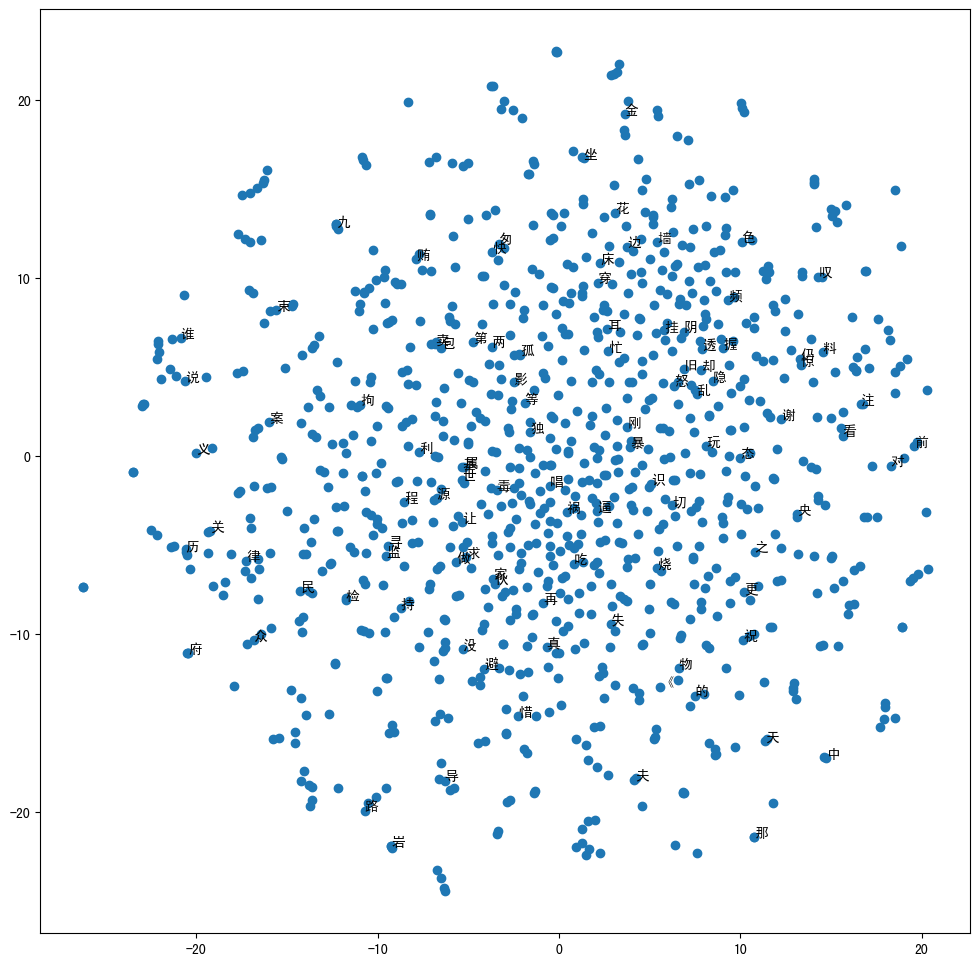

In [27]:
plot_with_matplotlib(x_vals, y_vals, labels)